# N002 シルエット画像の生成

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ローカルランタイムで実行する場合
```jupyter notebook  --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8888```


### Google Colaboratory で実行する場合
次のセルを実行し、表示されたリンク先にアクセスし、接続を許可します。表示されたコードを枠内にペーストしてEnterすると、左のエリアに drive というフォルダが現れます。このフォルダ内の MyDrive は自分の Google Drive そのものです。

Google Colab では作成した notebook は Google Drive の「Colab notebook」というフォルダに残りますが、それ以外のすべてのファイルはその場限りで消されれてしまいますが、Google Drive を保存先にしておけば消されずに残ります。

大量のデータをアップロードするのも、Google Drive を使うのが便利です。


In [2]:
import sys
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append('/content/drive/MyDrive/RadiShLab')
    COLABORATORY = True
except ImportError:
    COLABORATORY = False
    sys.path.append('./rdlib')
import rdlib8 as rd

In [3]:
# サンプルの画像フォルダのパス
if COLABORATORY:
    DATAFOLDER = '/content/drive/MyDrive/RadiShLab/RDSamples/original'
else:
    DATAFOLDER = 'RDSamples/original'
# 指定フォルダ内の画像を収集
imgs = rd.collectimages(DATAFOLDER)

# RDreform()　
## rd.RDreform(img,order,ksize,shrink)

> 入力  
>>   **img** 入力画像

> パラメータ  
>.   **order**  取り出したい領域番号（最大白領域なら１、2番目に大きな領域なら２...） 
>    **ksize**  ガウスぼかしのサイズ　０なら自動判定  
>    **shrink** 　膨張収縮による平滑化の指数　デフォルトは0.8（大きさが元の８割になるまで縮小し、元に戻す）

> 出力
>>   **outimg**  平滑化した画像

画像中で大根の主要部が一番大きな白領域である場合は、 RDreform()関数のデフォルトでシルエット画像が生成できる.

この関数は、次のような手順でシルエットを抽出する。
1. ガウスぼかしで輪郭を平滑化
2. 判別分析法で２値化
3. 白連結成分のうち、面積の大きさの順位が order 番目の領域を抽出
4. ミディアンフィルタによるノイズ除去
5. 膨張収縮による穴やひげの除去
5. 輪郭の平滑化


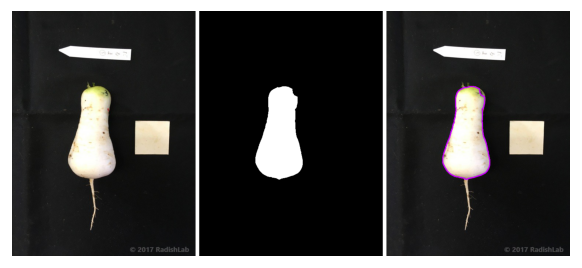

In [4]:
img = imgs[0]
rdimg = rd.RDreform(img)
plt.figure(dpi=120)
rd.plotimg(rd.mkparaimage([img,rdimg,rd.draw2(rdimg,img)]))

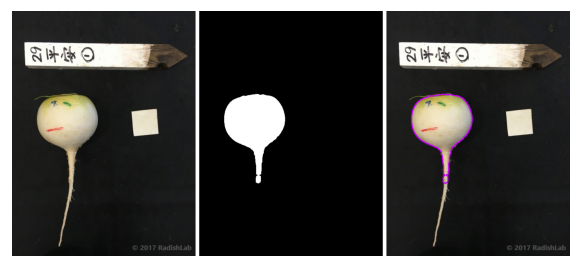

In [5]:
img = imgs[1]
rdimg = rd.RDreform(img)
plt.figure(dpi=120)
rd.plotimg(rd.mkparaimage([img,rdimg,rd.draw2(rdimg,img)]))

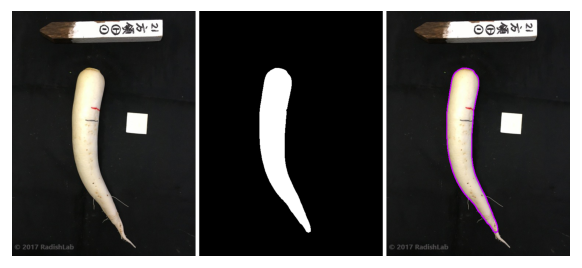

In [6]:
img = imgs[2]
rdimg = rd.RDreform(img)
plt.figure(dpi=120)
rd.plotimg(rd.mkparaimage([img,rdimg,rd.draw2(rdimg,img)]))

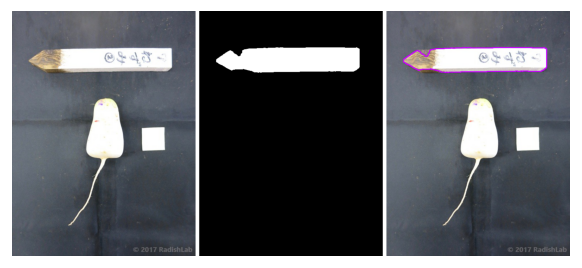

In [7]:
img = imgs[6]
rdimg = rd.RDreform(img)
plt.figure(dpi=120)
rd.plotimg(rd.mkparaimage([img,rdimg,rd.draw2(rdimg,img)]))

デフォルトでは一番大きな白領域を取り出している。この例では杭が一番おおきいために杭が取り出されてしまっている。

このような場合には、取り出したい領域の面積順位を order=2 という風に明示的に与える。

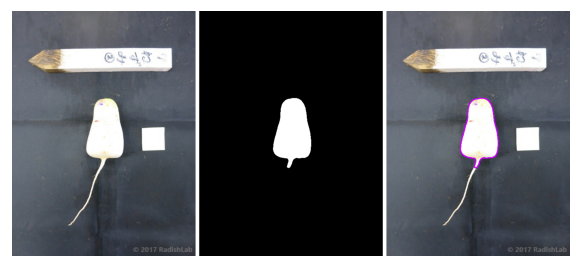

In [8]:
img = imgs[6]
rdimg = rd.RDreform(img,order=2)
plt.figure(dpi=120)
rd.plotimg(rd.mkparaimage([img,rdimg,rd.draw2(rdimg,img)]))

# getRadish()　... GrabCut による大根の切り出し　
> **rd.getRadish(img,order=1,shrink=SHRINK)**  
> 入力
>>   **img**

> パラメータ  RDreform() に準拠  
> 出力  結果画像

getRadish() は GrabCut という手法を用いて、カラー画像中の１つの大根領域を抽出する関数である。

RDreform は画像全体で２値化のしきい値を決める。画像中には指標なども映り込んでいるので、場合によってはしき値が適切に選べずに、きれいに切り出せないこともありうる。

そのような場合、GrabCut によるセグメンテーションが有効でである。

GrabCut は、前景と背景がなるべく不連続であり、境界部のそれぞれの領域は連続的であり、かつ前景はただひとつの連続する輪郭を持つように画像を分離する手法である。

RDrefom() をいきなり使った場合よりも、GrabCut で大根部分だけを切り出してから RDreform() を使ったほうが、質のよいシルエットを生成できるだろう。


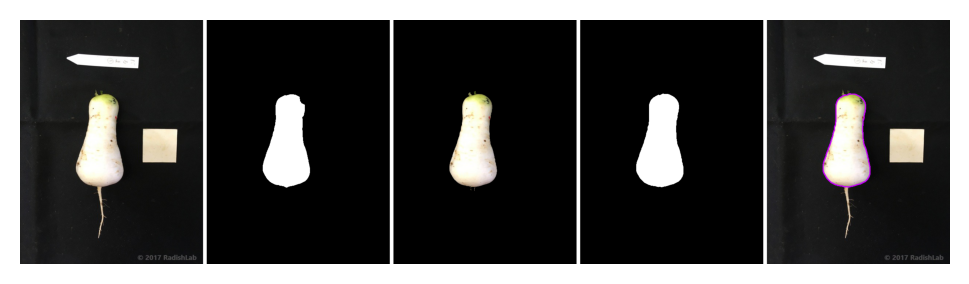

In [9]:
img  = imgs[0]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

左から、
1. 原画像
2. RDreform(原画像)によるシルエット
3. GrabCutによる自動セグメンテーションの結果画像
4. getRadish(原画像) = RDreform(３のシルエット）
5. ４と原画像の合成

この例では、原画像に対して 直接 RDreform を適用した左から２つ目のシルエットは、対象に直接書かれたマーキングの影響で根部右上の部分が凹んでしまっているのに対し、getRadish の結果の方は、マーキングの影響はなく、シルエットの輪郭が滑らかで自然である。

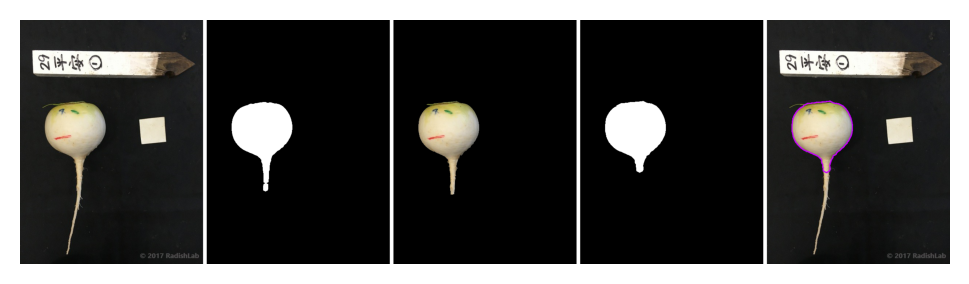

In [10]:
img  = imgs[1]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

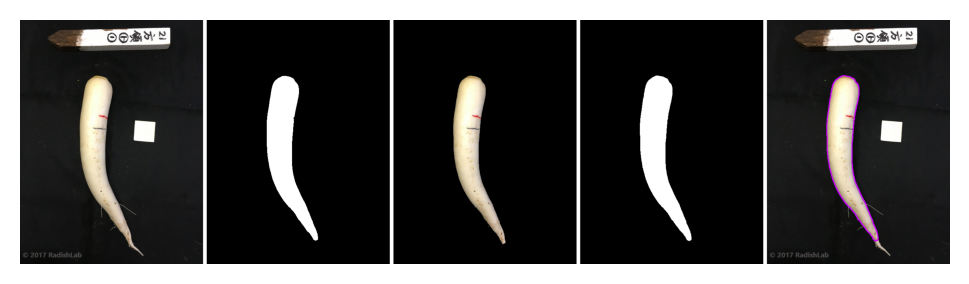

In [11]:
img  = imgs[2]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

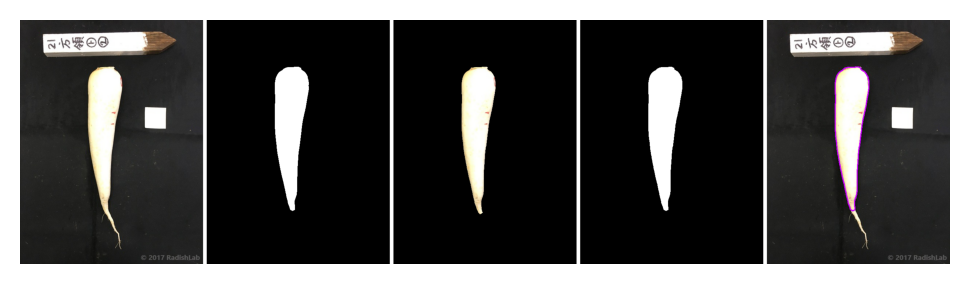

In [12]:
img  = imgs[3]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

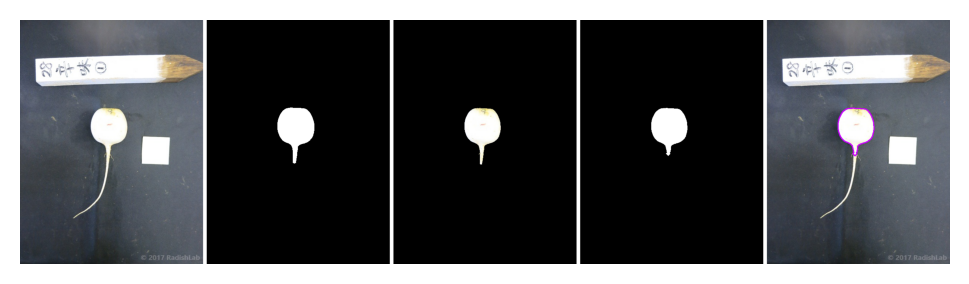

In [13]:
img  = imgs[4]
gcimg,simg = rd.getRadish(img,order=2)
rdimg = rd.RDreform(img,order=2)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

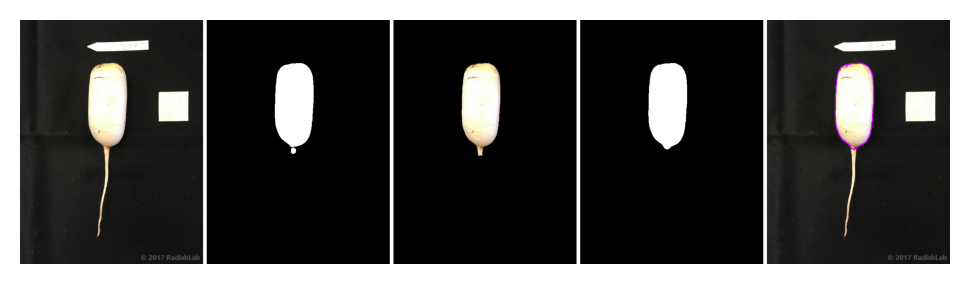

In [14]:
img  = imgs[5]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

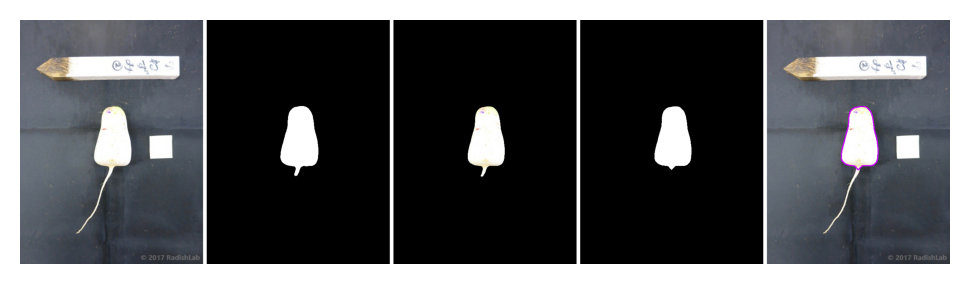

In [15]:
img  = imgs[6]
gcimg,simg = rd.getRadish(img,order=2)
rdimg = rd.RDreform(img,order=2)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

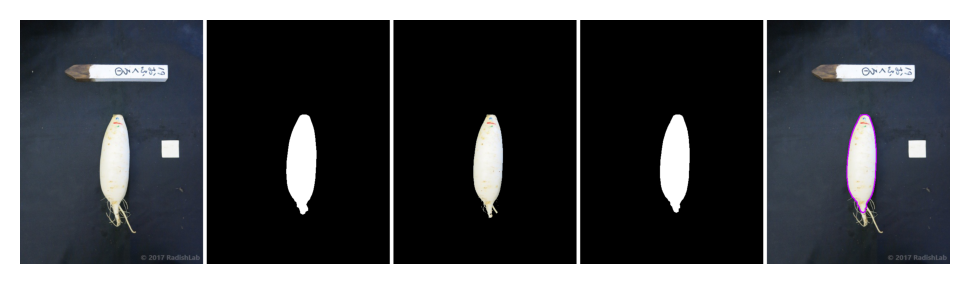

In [16]:
img  = imgs[7]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

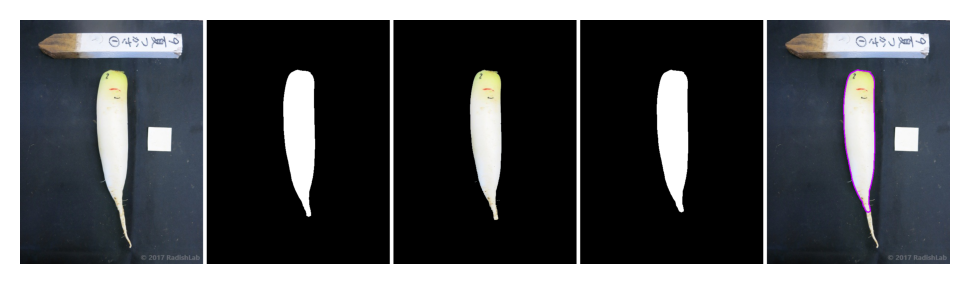

In [17]:
img  = imgs[8]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))

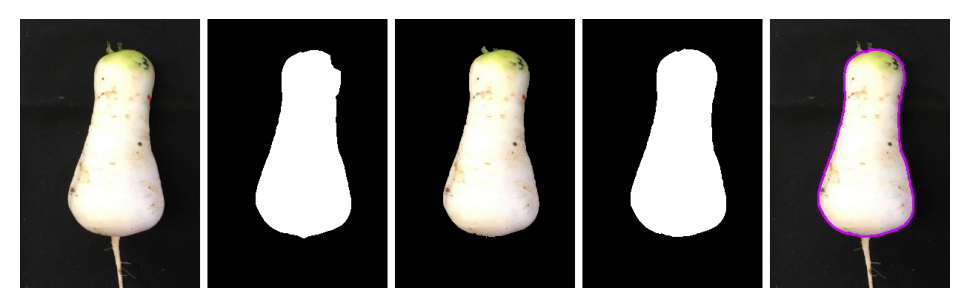

In [18]:
img  = imgs[9]
gcimg,simg = rd.getRadish(img)
rdimg = rd.RDreform(img)
plt.figure(dpi=200)
rd.plotimg(rd.mkparaimage([img,rdimg,gcimg,simg,rd.draw2(simg,img)]))